## Customer Segmentation
## K-Means & Hierarchical Clustering
### Problem
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.
### Dataset Atrributes
**People**

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

In [1]:
# IMPORTING REQUIRED LIBRARIES

# FOR DATA EXPLORATION AND VISUALIZATION
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# FOR MACHINE LEARNING MODELLING
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score,silhouette_samples
from scipy.cluster.hierarchy import cut_tree,dendrogram,linkage

In [2]:
df = pd.read_csv('marketing_campaign.csv.xls',sep='\t')

In [3]:
df.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

In [4]:
pd.set_option('display.max_columns',30)

In [5]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88              546   
1            1  08-03-2014       38        11          1                6   
2            0  21-08-2013       26       426         49              127   
3            0  10-02-2014       26        11          4               20   
4            0  19-01-2014       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  13-06-2013       46       709         43              182   
2236         1  10-06-2014       56       406          0               30   
2237         0  25-01-2014       91       908         48              217   
2238         1  24-01-2014        8       428         30              214   
2239         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# CHECKING FOR NULL VALUES
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [8]:
# REMOVING NULL VALUES
df = df.dropna()

In [9]:
df.shape

(2216, 27)

In [10]:
# CHECKING WHETHER THERE ARE ANY DUPLICATED RECORDS
df.duplicated().sum()

0

## Data Exploration

In [11]:
df['Year_Birth']

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2216, dtype: int64

##### Finding the Age of Customer using the Year_Birth feature

In [12]:
df['Age'] = 2023 - df['Year_Birth']

In [13]:
df.sample(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
775    6825        1953  Graduation       Together  41452.0        1   
1531    125        1958    2n Cycle       Together  53083.0        1   
563   10681        1970    2n Cycle        Married  62466.0        0   
325    7214        1957  Graduation        Married  62187.0        0   
1999    176        1980    2n Cycle         Single  67506.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
775          1  06-03-2013       86        13          0                3   
1531         1  15-05-2013       65       215          7               33   
563          1  15-01-2014       13       129        129              259   
325          0  05-07-2013       49       792          0              275   
1999         1  02-01-2014       73        90         38               67   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
775                 0                 0             0                  1   
1531                3                 0            13                  6   
563               168               121            83                  5   
325                45                45           126                  1   
1999               33                36            67                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
775                 1                    0                  2   
1531                5                    1                  5   
563                 6                    3                 12   
325                 4                    8                  5   
1999                4                    1                  6   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
775                   7             0             0             0   
1531                  7             0             1             0   
563                   4             0             0             0   
325                   3             0             0             0   
1999                  3             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  
775              0             0         0         0   70  
1531             0             0         0         0   65  
563              0             0         0         0   53  
325              0             0         0         0   66  
1999             0             0         0         0   43

In [14]:
# SETTING COLOR PREFERENCES IN SEABORN PLOTS
sns.set(rc={"axes.facecolor":"#dae3f2","figure.facecolor":"#dae3f2"})

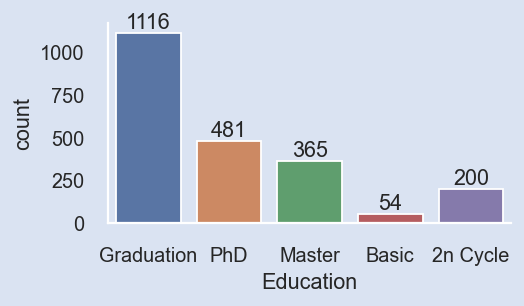

In [15]:
plt.figure(figsize=(4,2),dpi=130)
education_countplot = sns.countplot(data=df,x='Education')

for i in education_countplot.containers:
  education_countplot.bar_label(i,)

sns.despine()
plt.grid(False)

#### Based on Education we are going to segement them into Undergraduate,Graduate,Postgraduate

In [16]:
df["Education"] = df['Education'].replace({'Basic':'Undergraduate',
                         '2n Cycle':'Undergraduate',
                         'Graduation':'Graduate',
                         'Master':'Postgraduate',
                         'PhD':'Postgraduate'})

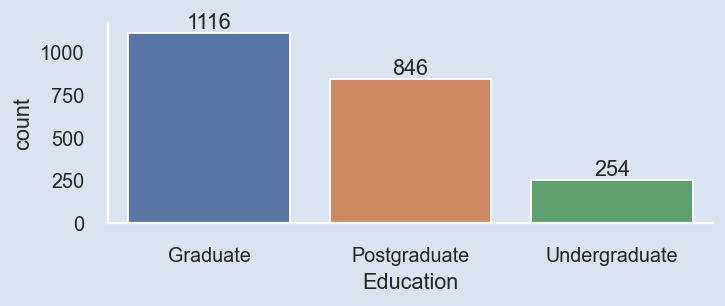

In [17]:
plt.figure(figsize=(6,2),dpi=130)
education_countplot = sns.countplot(data=df,x='Education')

for i in education_countplot.containers:
  education_countplot.bar_label(i,)

sns.despine()
plt.grid(False)

In [18]:
# GETTING UNIQUE VALUES IN MARITAL_STATUS COLUMN
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [19]:
df["Marital_Status"] = df['Marital_Status'].replace({'Single':'Alone',
                              'Together':'Married',
                              'Married':'Married',
                              'Divorced':'Alone',
                              'Widow':'Alone',
                              'Alone':'Alone',
                              'Absurd':'Alone',
                              'YOLO':'Alone'})

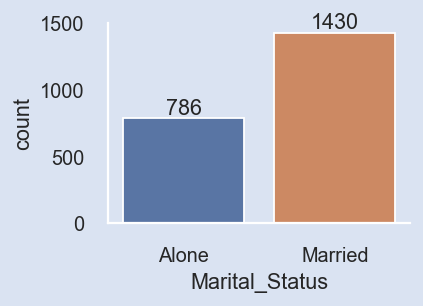

In [20]:
plt.figure(figsize=(3,2),dpi=130)
marital_status_countplot = sns.countplot(data=df,x='Marital_Status')

for i in marital_status_countplot.containers:
  marital_status_countplot.bar_label(i,)

sns.despine()
plt.grid(False)

##### Checking distribution of Income Feature

In [21]:
px.box(data_frame=df,x='Income',title='Boxplot of Income',width=900,height=500,notched=True)

In [22]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

* **Most of Income values of Customers lie in between 35303,68522**
* **There is 1 outlier where income is 666666**

##### Creating a feature of Children using Kidhome and Teenhome

In [23]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [24]:
# DROPPING KIDHOME,TEENHOME COLUMNS
df.drop(columns=['Kidhome','Teenhome'],inplace=True)

##### Creating a feature of Family size 

In [25]:
df['Family_size'] = df['Marital_Status'].replace({'Alone':1,
                                                 'Married':2}) + df['Children']

##### Creating a feature Is_Parent based on whether customer have children or not

In [26]:
df['Is_Parent'] = np.where(df['Children']>0,1,0)

In [27]:
# GETTING THE DATA TYPE OF DT_CUSTOMER COLUMN
type(df['Dt_Customer'][0])

str

In [28]:
# CHANGING DATA TYPE FROM STRING TO DATETIME
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [29]:
type(df['Dt_Customer'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [30]:
print('Newest date of Enrollment in records is ',str(df['Dt_Customer'].max()).split()[0])
print('Oldest date of Enrollment in records is ',str(df['Dt_Customer'].min()).split()[0])

Newest date of Enrollment in records is  2014-12-06
Oldest date of Enrollment in records is  2012-01-08


In [31]:
df.reset_index(inplace=True)

##### Getting the number of days had been from customers enrollment date and newest enrollment date

In [32]:
df['Customer_For'] = [(df['Dt_Customer'].max() - df['Dt_Customer'][i]).days for i in range(len(df))]

##### Distribution plot of Recency

<Axes: xlabel='Recency', ylabel='Density'>

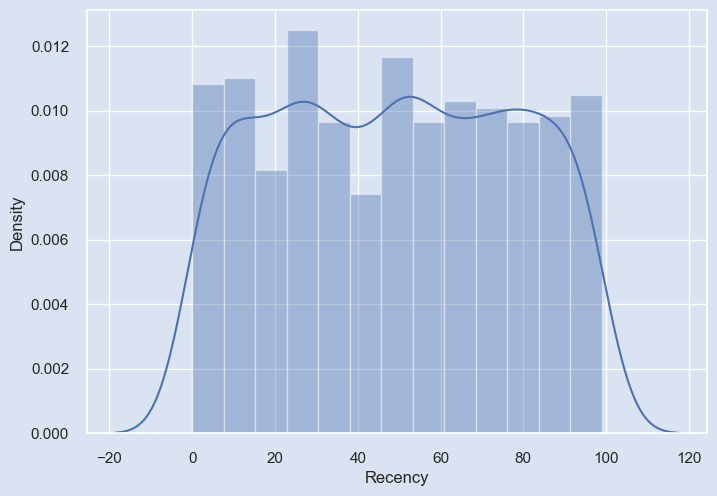

In [33]:
sns.distplot(df['Recency'])

In [34]:
# GETTING VALUE COUNTS OF COMPLAIN COLUMN
df['Complain'].value_counts()

0    2195
1      21
Name: Complain, dtype: int64

* **In past 2 Years,only 21 Customers had complained.**

MntWines,MntFruits,MntMeatProducts,MntFishProducts, MntSweetProducts,MntGoldProds are amount spent by a customer. \
Let,do add them and make a column Amount Spent

In [35]:
df['Amount Spent'] = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis='columns')

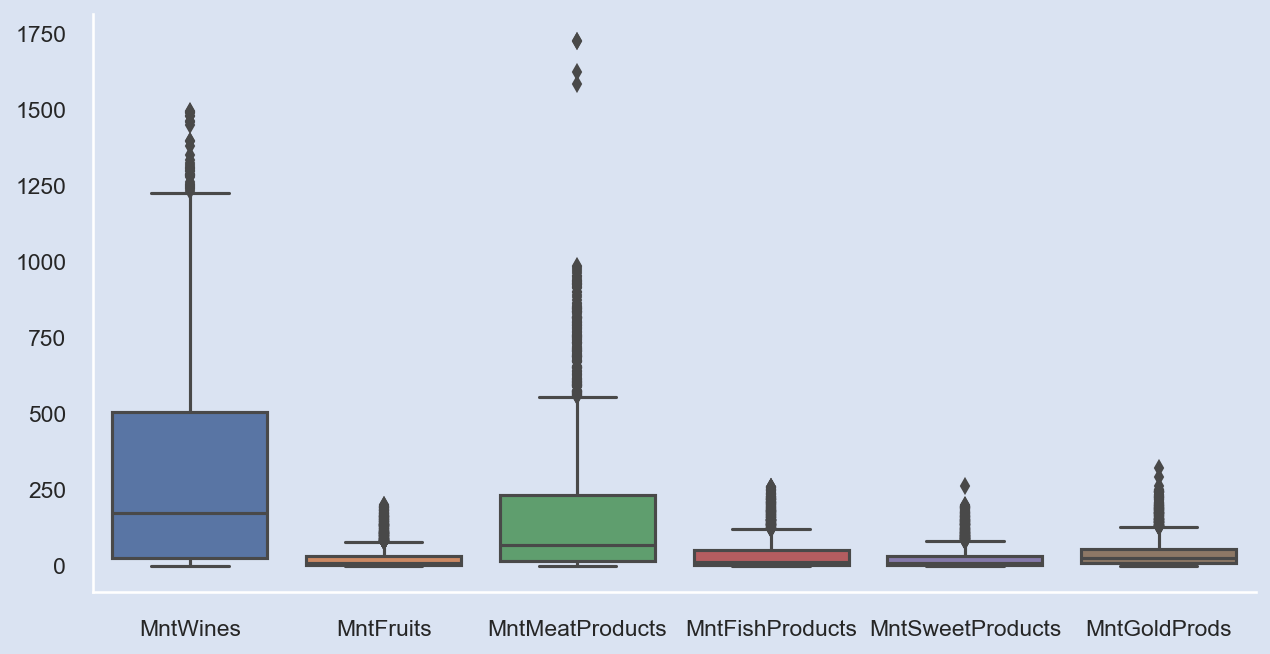

In [36]:
plt.figure(figsize=(10,5),dpi=150)
sns.boxplot(df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']])
plt.grid(False)
sns.despine()

* **More amount was spent on Wines,Meat**

In [37]:
print('\033[1m'+'Number of Customers accepted the Offer in 1st Campaign are ',df['AcceptedCmp1'].value_counts()[1])
print('\033[1m'+'Number of Customers accepted the Offer in 2nd Campaign are ',df['AcceptedCmp2'].value_counts()[1])
print('\033[1m'+'Number of Customers accepted the Offer in 3rd Campaign are ',df['AcceptedCmp3'].value_counts()[1])
print('\033[1m'+'Number of Customers accepted the Offer in 4rth Campaign are ',df['AcceptedCmp4'].value_counts()[1])
print('\033[1m'+'Number of Customers accepted the Offer in 5th Campaign are ',df['AcceptedCmp5'].value_counts()[1])

Number of Customers accepted the Offer in 1st Campaign are  142
Number of Customers accepted the Offer in 2nd Campaign are  30
Number of Customers accepted the Offer in 3rd Campaign are  163
Number of Customers accepted the Offer in 4rth Campaign are  164
Number of Customers accepted the Offer in 5th Campaign are  162


* **We can see that in 2nd campaign less number of customers had accepted the offer.**

In [38]:
print('\033[1m'+'Number of Customers rejected the Offer in 1st Campaign are ',df['AcceptedCmp1'].value_counts()[0])
print('\033[1m'+'Number of Customers rejected the Offer in 2nd Campaign are ',df['AcceptedCmp2'].value_counts()[0])
print('\033[1m'+'Number of Customers rejected the Offer in 3rd Campaign are ',df['AcceptedCmp3'].value_counts()[0])
print('\033[1m'+'Number of Customers rejected the Offer in 4rth Campaign are ',df['AcceptedCmp4'].value_counts()[0])
print('\033[1m'+'Number of Customers rejected the Offer in 5th Campaign are ',df['AcceptedCmp5'].value_counts()[0])

Number of Customers rejected the Offer in 1st Campaign are  2074
Number of Customers rejected the Offer in 2nd Campaign are  2186
Number of Customers rejected the Offer in 3rd Campaign are  2053
Number of Customers rejected the Offer in 4rth Campaign are  2052
Number of Customers rejected the Offer in 5th Campaign are  2054


NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases shows the number of purchases made by the Customer through Discount,company's website,catalogue,directly in store. \
Let's have a look on distribution plot of those features

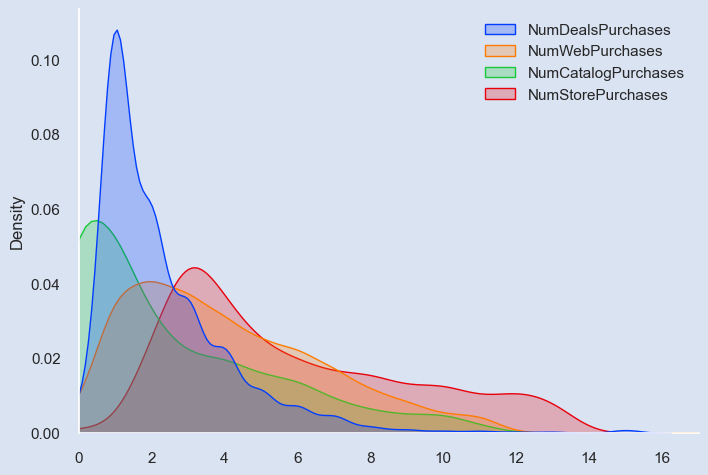

In [39]:
sns.kdeplot(data=df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases']],shade=True,palette='bright')
plt.xlim(left=0,right=17)
plt.grid(False)
sns.despine()

* **More purchases made with a discount,but number of purchases are in between 1 and 3.**
* **Through company's website more purchases had don with number of purchases in between 2 and 6.**
* **Number of purchases made through store cover more area from 2 to 9.**

#### Dealing with Outliers
We are going to remove the outliers in Income feature

In [40]:
px.scatter(data_frame=df,y='Income')

As per the above Plotly's Scatterplot,I am going to remove those records where Income is greater than 150k.

In [41]:
# GETTING INDICES OF RECORDS WHERE INCOME IS GREATER THAN 150K
income_outliers_index = df[df['Income']>150000].index

In [42]:
income_outliers_index

Int64Index([153, 604, 642, 674, 1287, 1636, 2109, 2209], dtype='int64')

In [43]:
# DROPPING THOSE RECORDS
df.drop(index=income_outliers_index,inplace=True)

##### Making a copy of dataframe

In [44]:
df_copy = df.copy()

In [45]:
# DROPPING FEATURES RELATED TO PROMOTION,INDEX FEATURES,DATE OF BIRTH
df_copy.drop(columns=['index','ID','Year_Birth','AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Response'],inplace=True)

In [46]:
df_copy.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Age', 'Children', 'Family_size',
       'Is_Parent', 'Customer_For', 'Amount Spent'],
      dtype='object')

<Axes: >

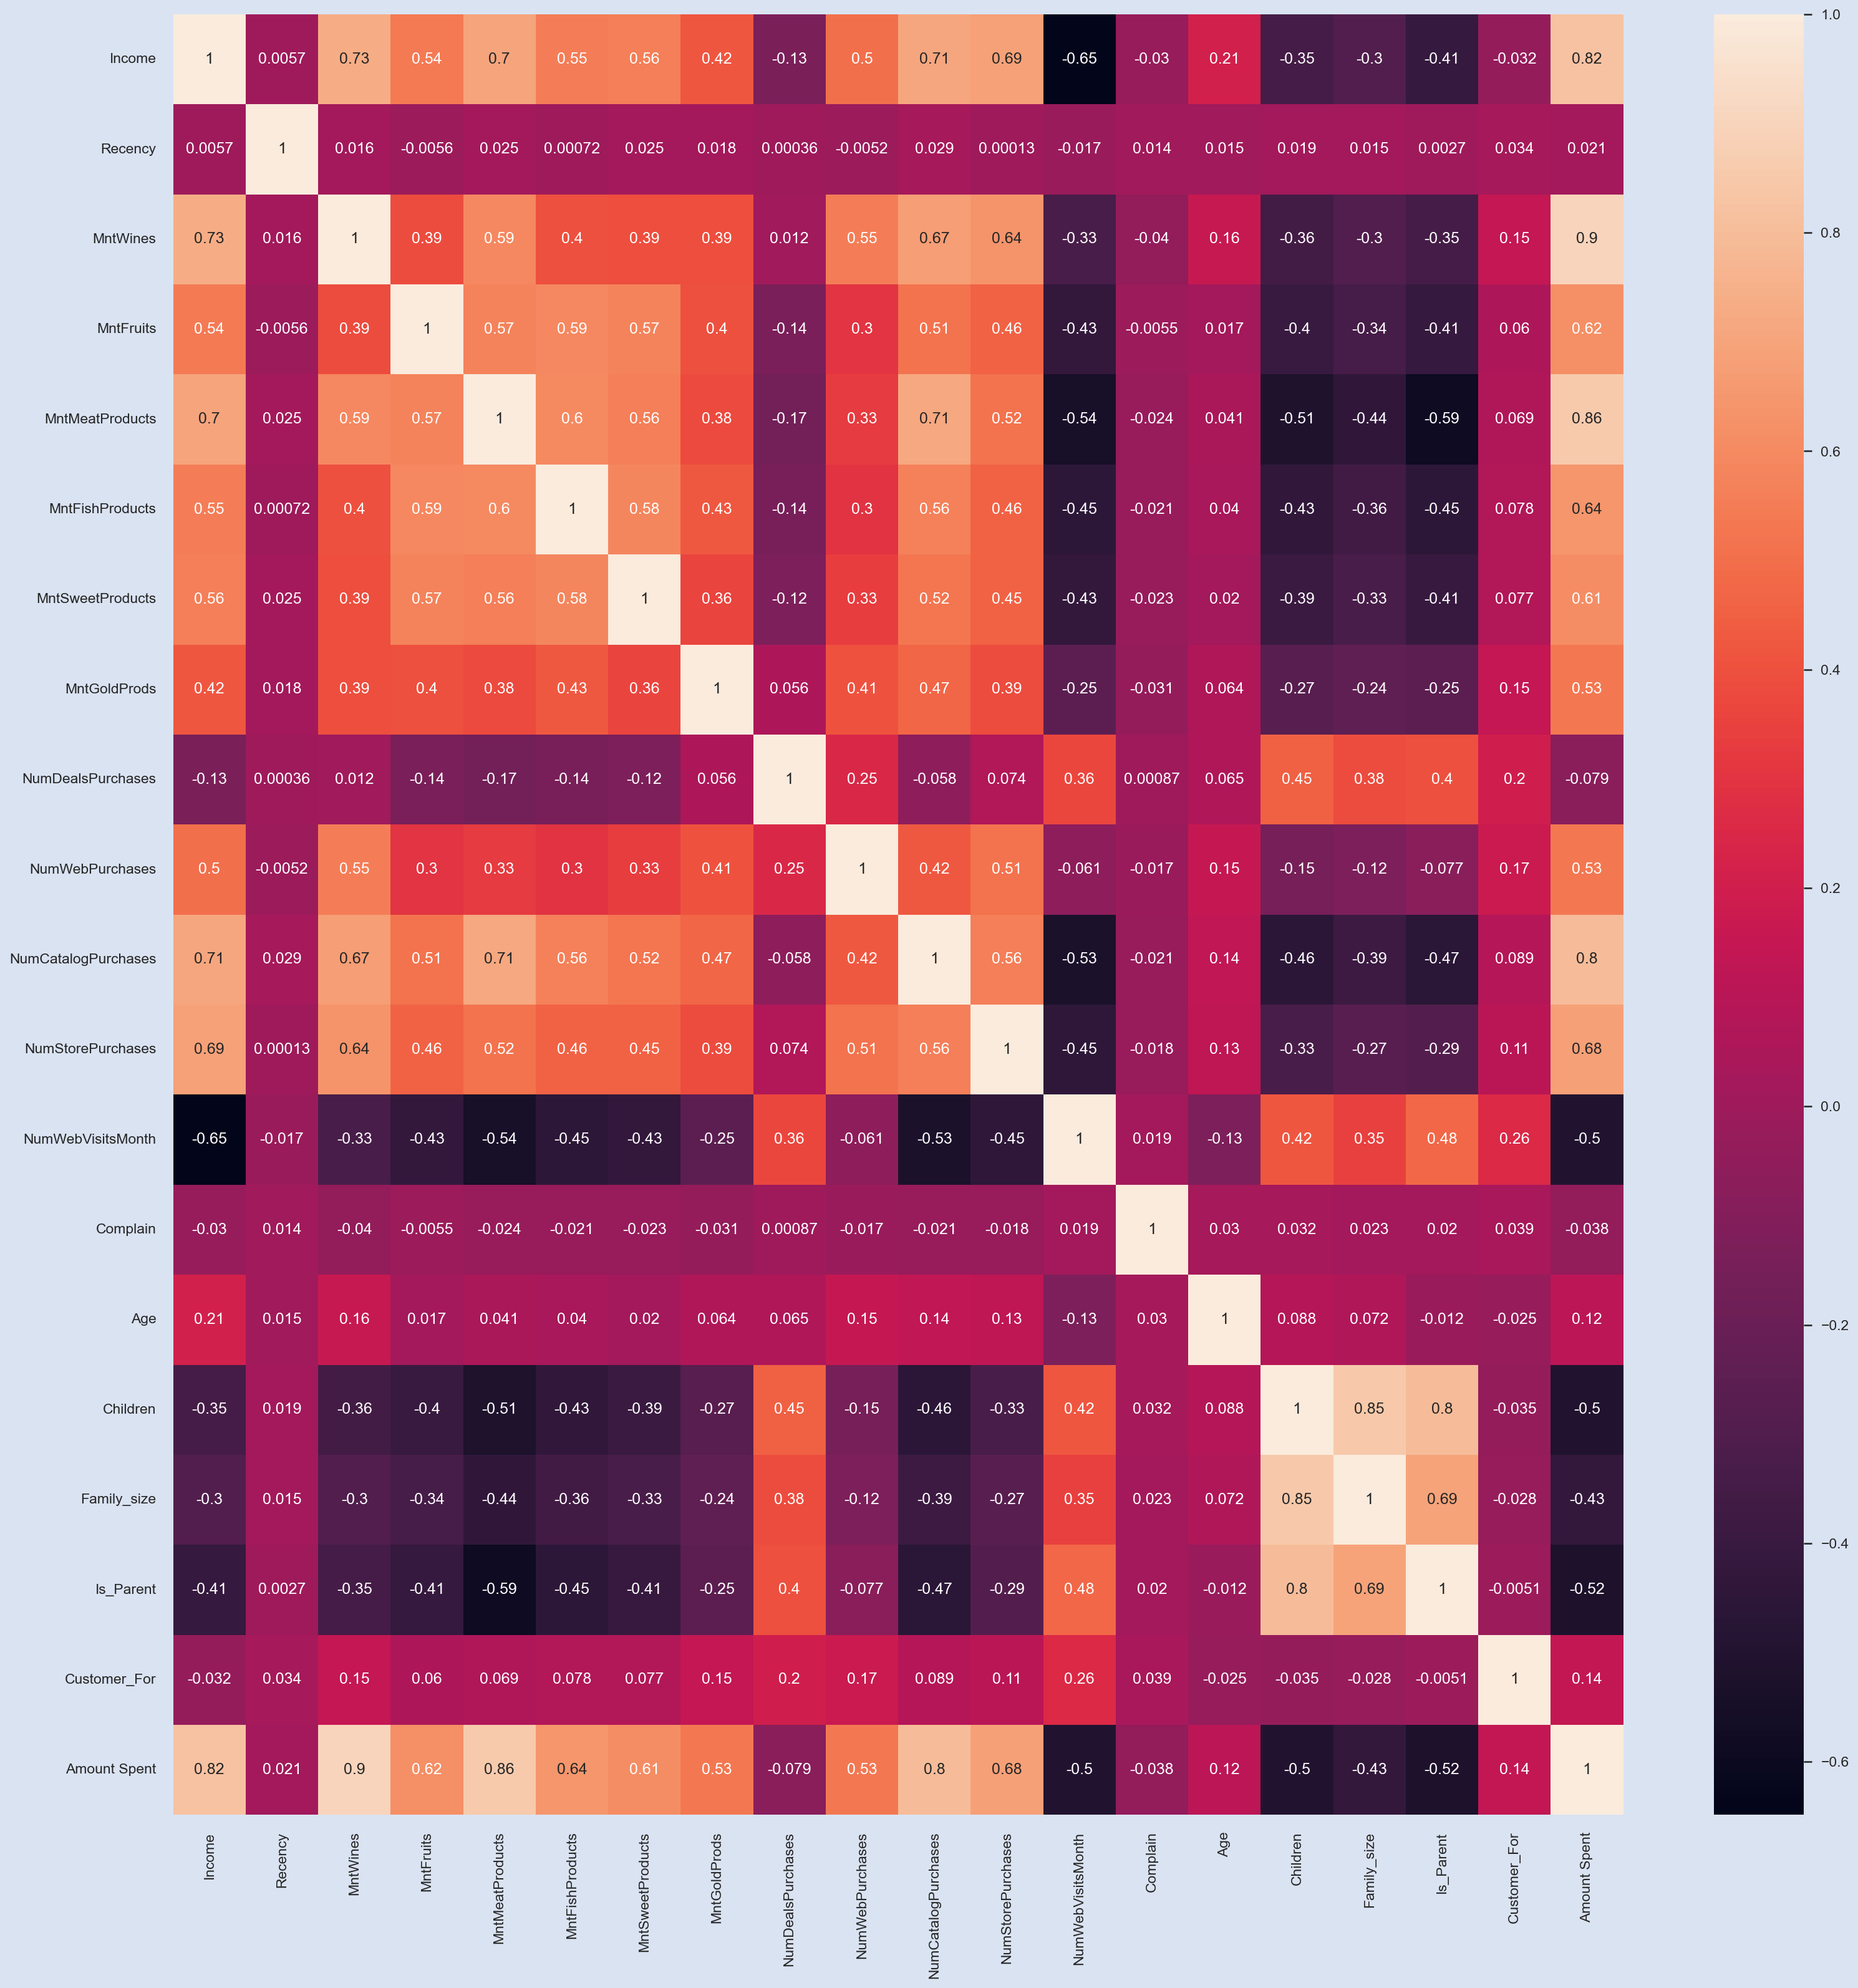

In [47]:
plt.figure(figsize=(25,25),dpi=150)
sns.heatmap(df_copy.corr(),annot=True)

### Categorical Features Encoding

In [48]:
df_copy.select_dtypes(include=['object'])

Education Marital_Status
0         Graduate          Alone
1         Graduate          Alone
2         Graduate        Married
3         Graduate        Married
4     Postgraduate        Married
...            ...            ...
2211      Graduate        Married
2212  Postgraduate        Married
2213      Graduate          Alone
2214  Postgraduate        Married
2215  Postgraduate        Married

[2208 rows x 2 columns]

In [49]:
df_copy['Education'] = df_copy['Education'].replace({'Undergraduate':1,
                              'Graduate':2,
                              'Postgraduate':3})

In [50]:
df_copy['Marital_Status'] = df_copy['Marital_Status'].replace({'Alone':0,
                              'Married':1})

In [51]:
df_copy.drop(columns=['Dt_Customer'],inplace=True)

### Scaling the data

In [52]:
scaler = StandardScaler()
scaled_df_copy = scaler.fit_transform(df_copy)

## K-Means Clustering
### Elbow method

### K-Means Parameters:
* n_clusters --> Number of clusters 
* n_init --> specifies how many times to run the k-means clustering algorithms independently with different random centroids to choose the final model as the one with the lowest SSE(Sum of Sqaures Errors)

In [53]:
# conda update jupyter

In [54]:
# SUM OF SQUARED DISTANCES
ssd = []

for i in range(1,7):
  kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,
                  tol=0.0001,random_state=31,n_init=10)
  kmeans.fit(scaled_df_copy)
  ssd.append(kmeans.inertia_)

Text(0, 0.5, 'SSD')

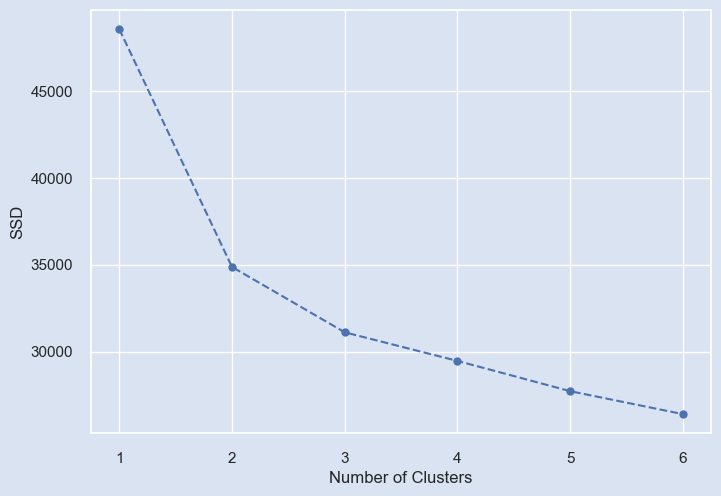

In [55]:
plt.plot(range(1,7),ssd,'o--')
plt.xlabel('Number of Clusters')
plt.ylabel('SSD')

**Using number of clusters 4 may be better.**

### Silhouette Analysis

For n_clusters = 2 The average silhouette_score is : 0.28525918290648883
For n_clusters = 3 The average silhouette_score is : 0.20224974873603044
For n_clusters = 4 The average silhouette_score is : 0.14482476335243305
For n_clusters = 5 The average silhouette_score is : 0.12815513543808266
For n_clusters = 6 The average silhouette_score is : 0.12282117336387804
For n_clusters = 7 The average silhouette_score is : 0.1210405393601318


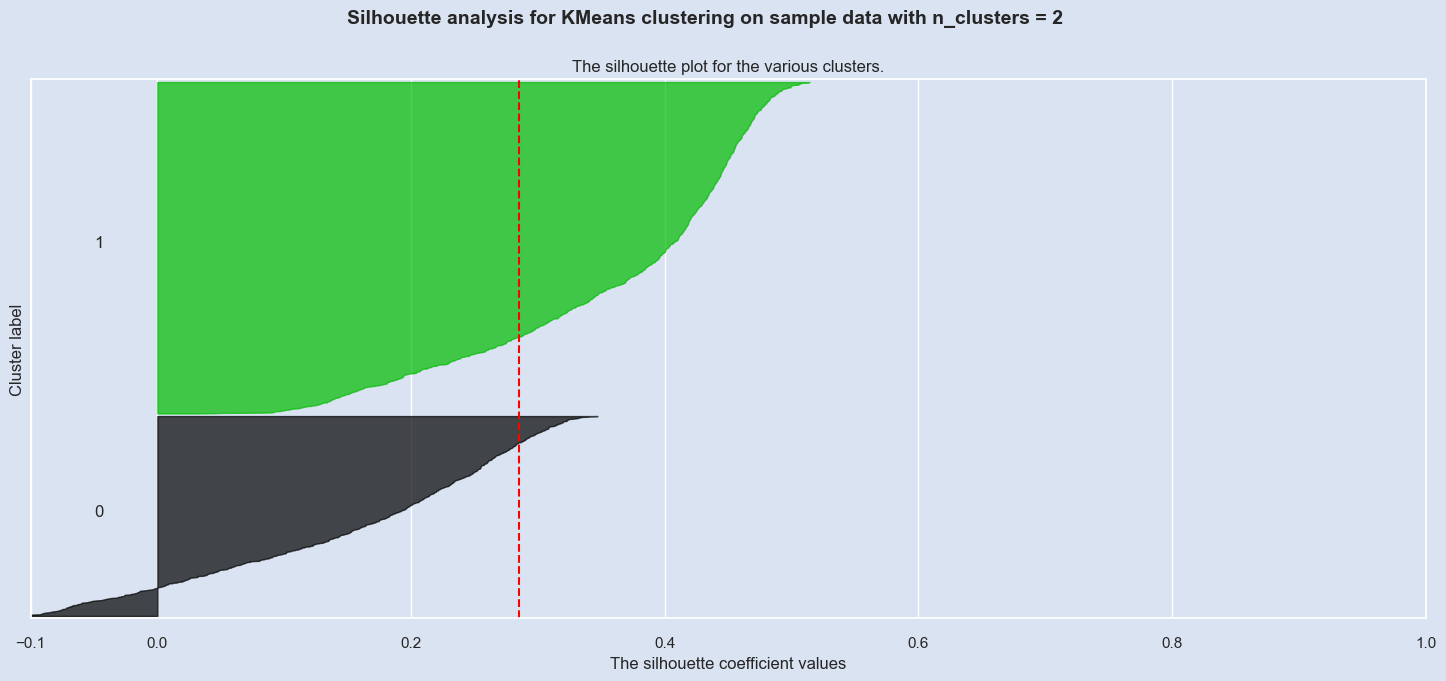

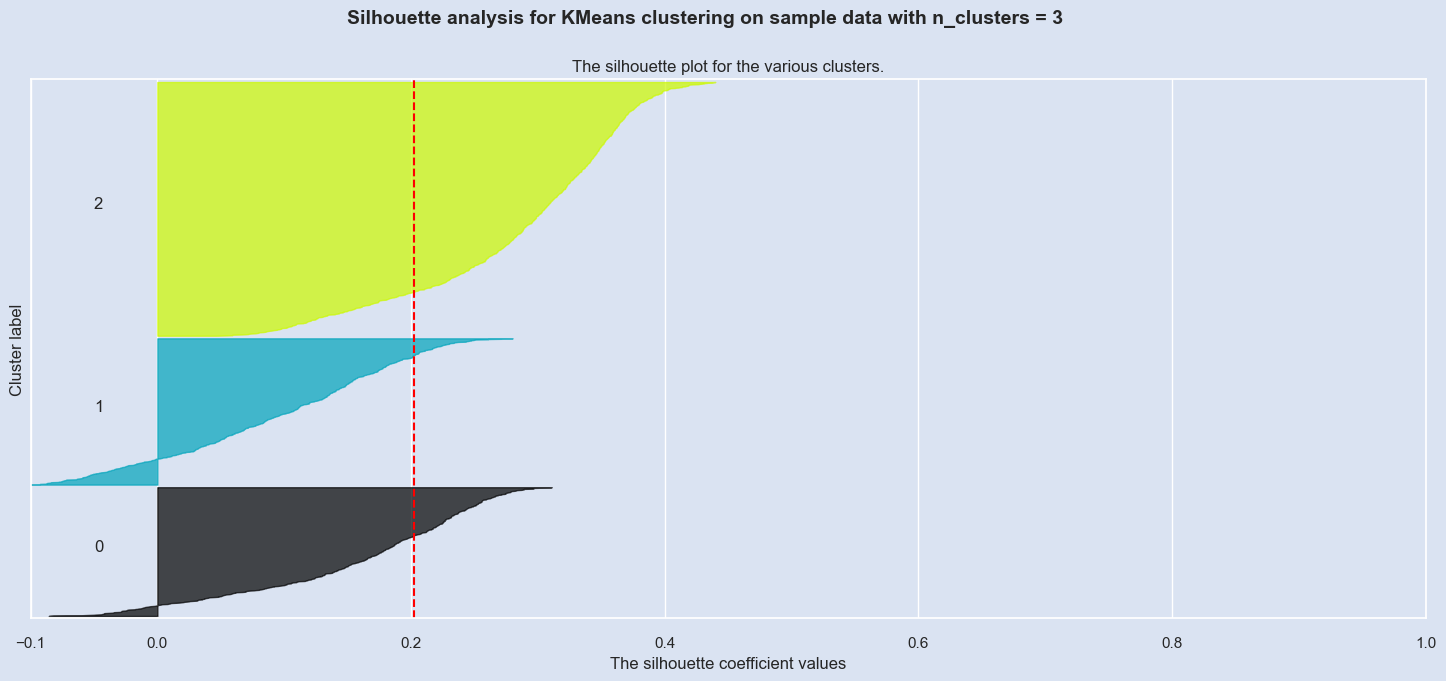

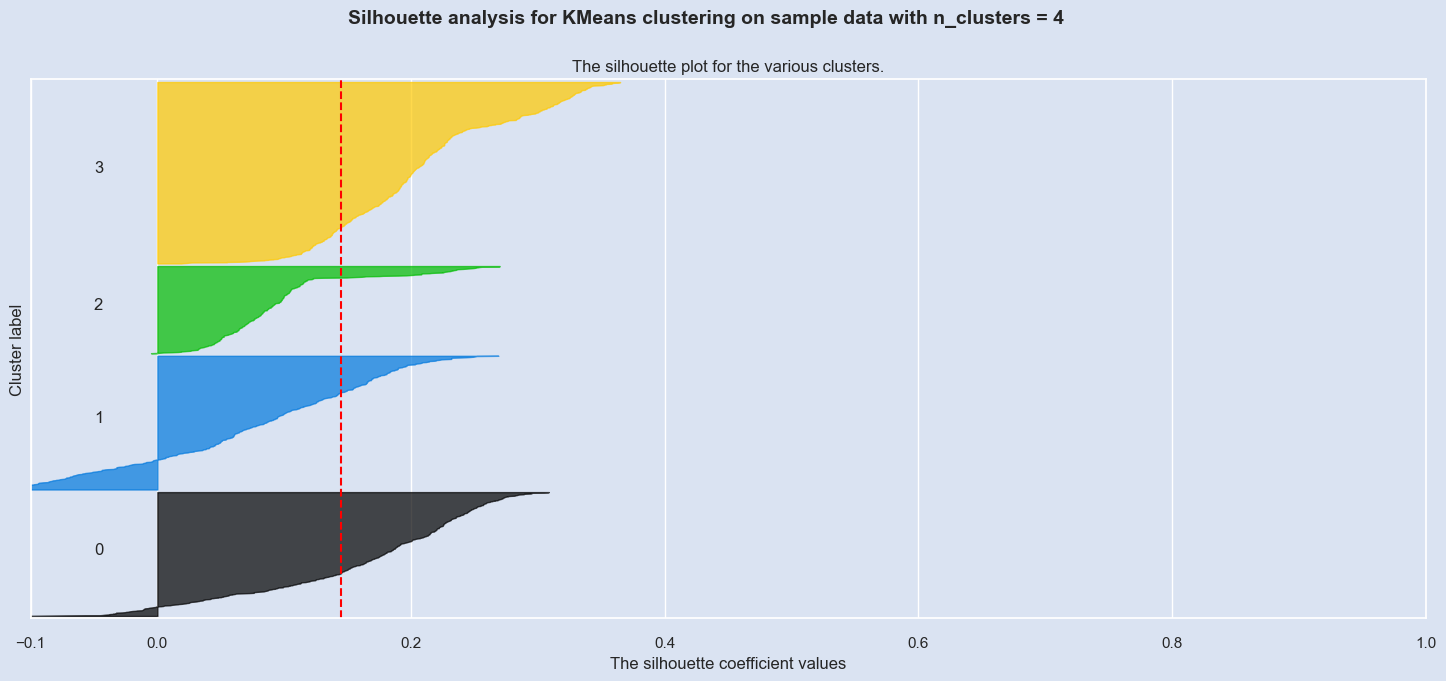

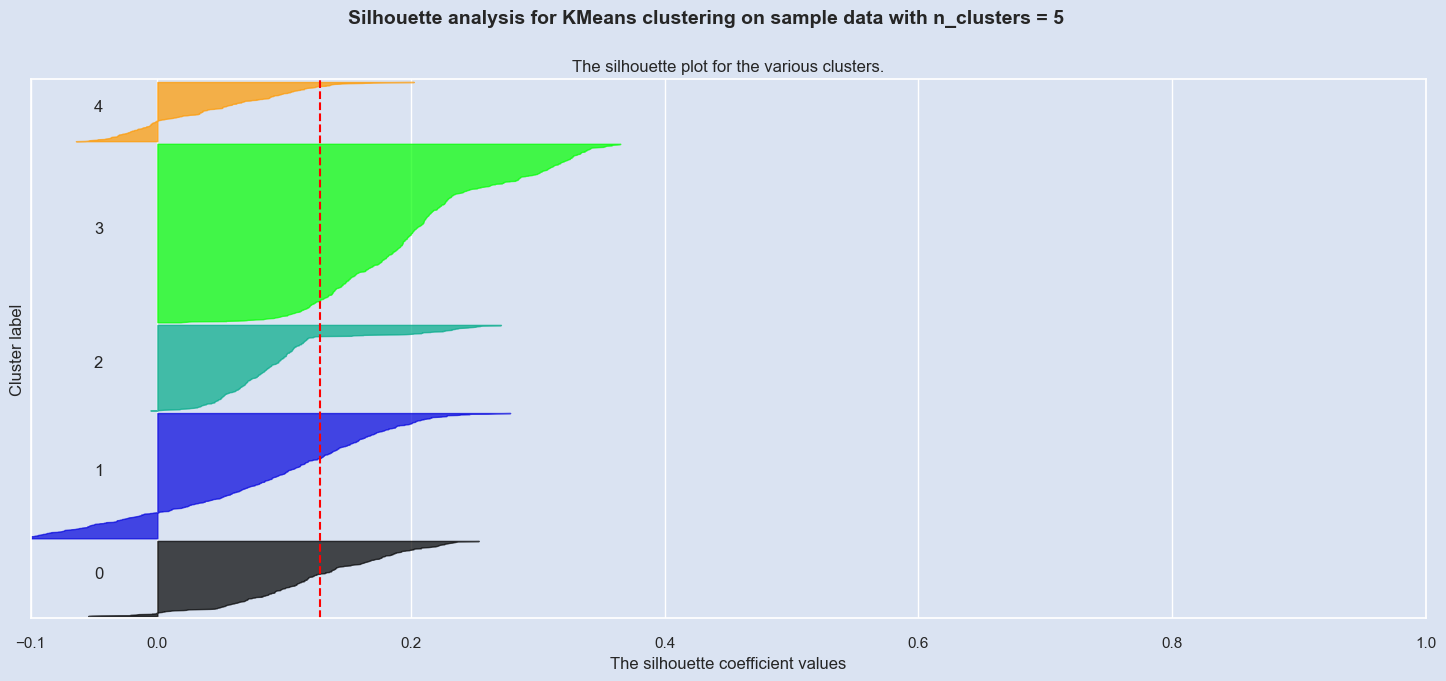

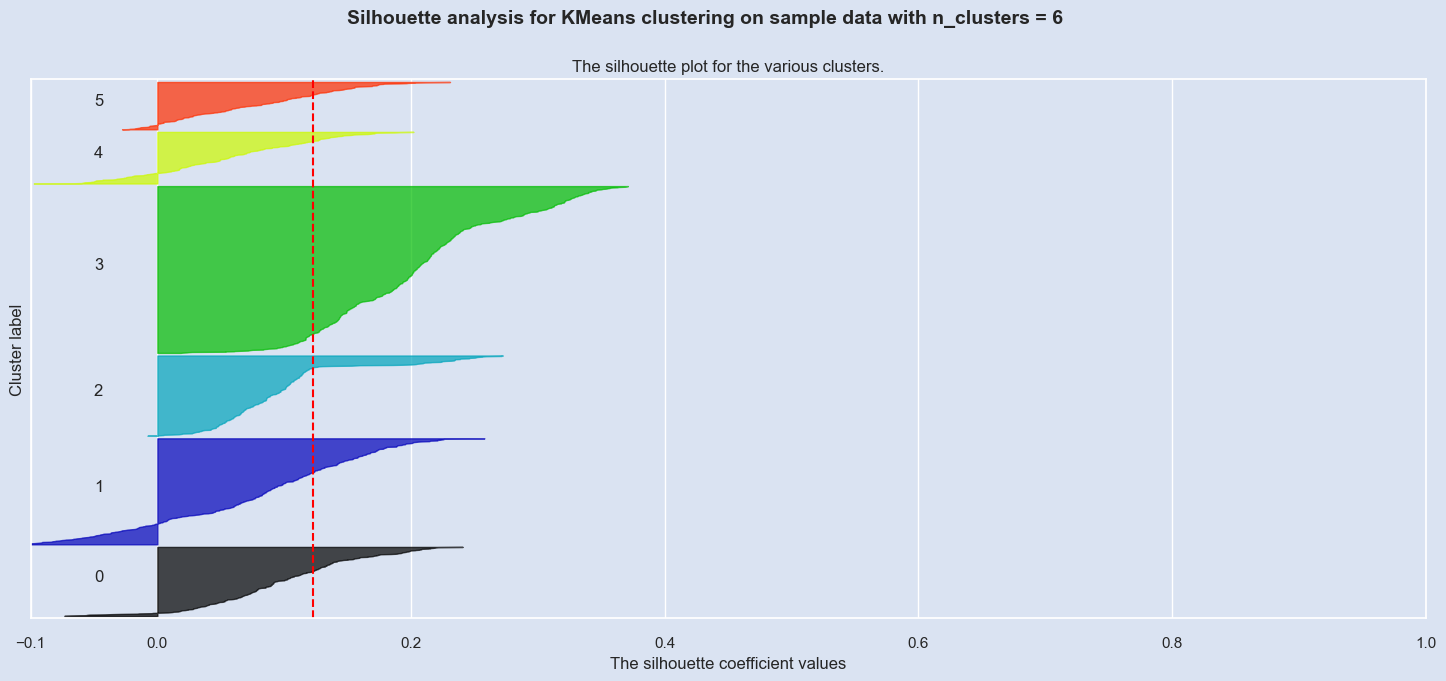

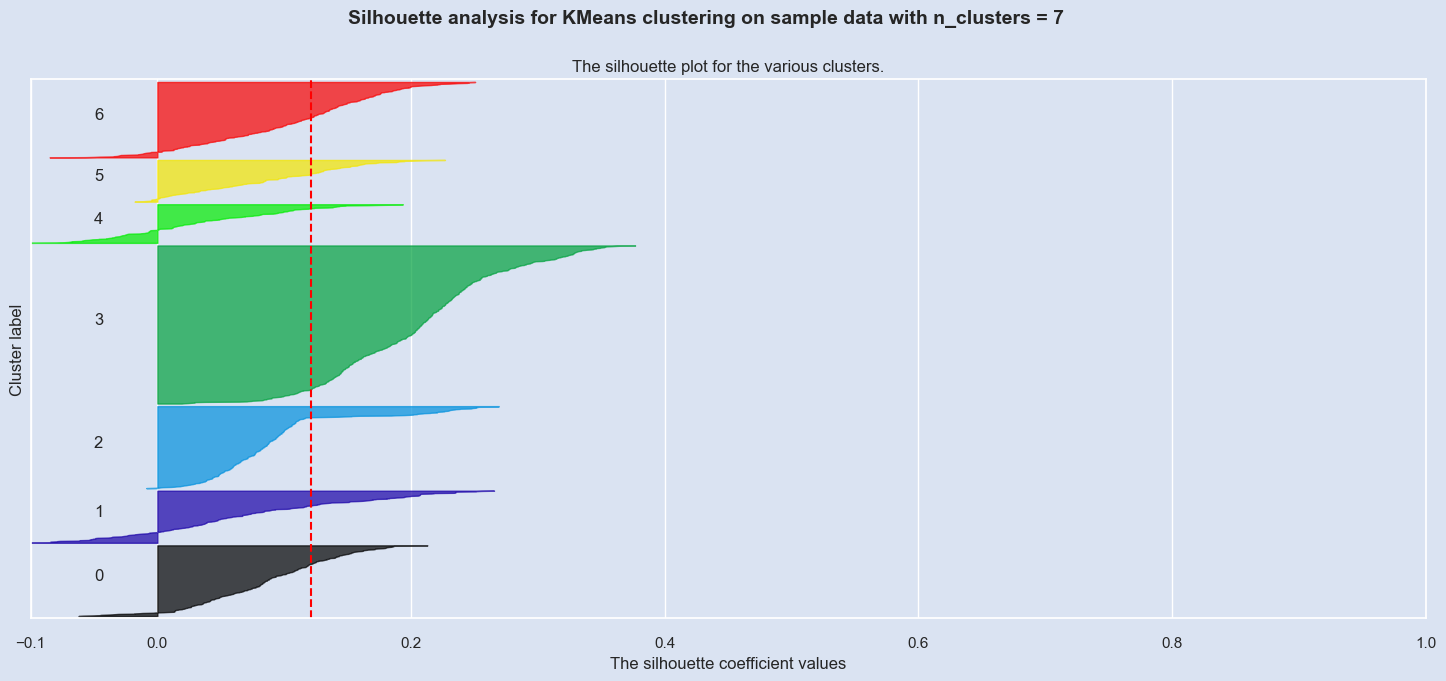

In [56]:
for n_clusters in range(2,8):
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1,1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_df_copy) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_df_copy)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_df_copy, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_df_copy, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

#### YellowBrick - KElbow Visualizer

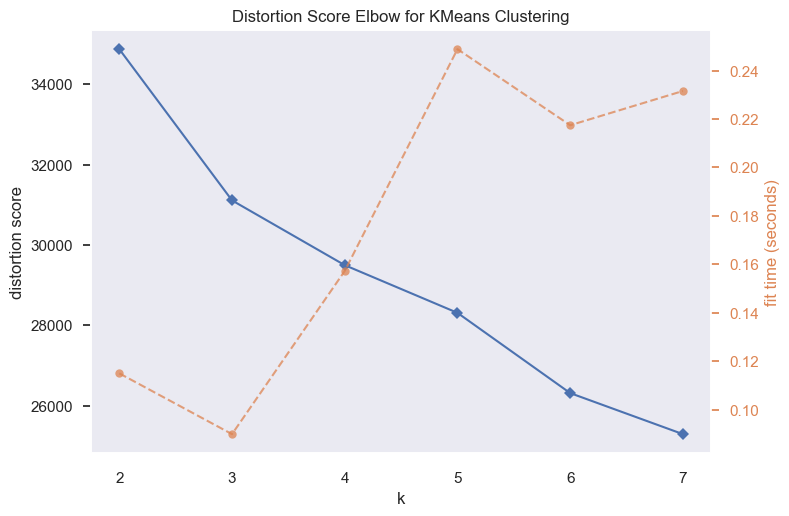

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
sns.set_style('dark')
kmeans_model = KMeans()
k_elbow_visualizer = KElbowVisualizer(estimator=kmeans_model,k=(2,8))
k_elbow_visualizer.fit(scaled_df_copy)
k_elbow_visualizer.show()

## Agglomerative Clustering

In [58]:
scaled_df_copy

array([[-0.4076791 , -1.34637991,  0.31408859, ..., -1.58440331,
         1.97548245,  1.67807547],
       [-0.4076791 , -1.34637991, -0.2554309 , ...,  0.63115243,
        -1.66444278, -0.96332276],
       [-0.4076791 ,  0.74273242,  0.96478175, ..., -1.58440331,
        -0.17147109,  0.28095854],
       ...,
       [-0.4076791 , -1.34637991,  0.25821831, ..., -1.58440331,
        -0.84696548,  1.05344293],
       [ 1.12580548,  0.74273242,  0.8504336 , ...,  0.63115243,
        -0.84266297,  0.39226274],
       [ 1.12580548,  0.74273242,  0.05965429, ...,  0.63115243,
         1.16230766, -0.72244053]])

In [59]:
agglomerative_model = AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
pred = agglomerative_model.fit_predict(scaled_df_copy)

In [60]:
pred

array([1, 0, 1, ..., 1, 2, 0])

In [61]:
df_copy["Cluster"] = pred

In [62]:
df_copy

Education  Marital_Status   Income  Recency  MntWines  MntFruits  \
0             2               0  58138.0       58       635         88   
1             2               0  46344.0       38        11          1   
2             2               1  71613.0       26       426         49   
3             2               1  26646.0       26        11          4   
4             3               1  58293.0       94       173         43   
...         ...             ...      ...      ...       ...        ...   
2211          2               1  61223.0       46       709         43   
2212          3               1  64014.0       56       406          0   
2213          2               0  56981.0       91       908         48   
2214          3               1  69245.0        8       428         30   
2215          3               1  52869.0       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 546              172                88            88   
1                   6                2                 1             6   
2                 127              111                21            42   
3                  20               10                 3             5   
4                 118               46                27            15   
...               ...              ...               ...           ...   
2211              182               42               118           247   
2212               30                0                 0             8   
2213              217               32                12            24   
2214              214               80                30            61   
2215               61                2                 1            21   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2211                  2                9                    3   
2212                  7                8                    2   
2213                  1                2                    3   
2214                  2                6                    5   
2215                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  Complain  Age  Children  \
0                     4                  7         0   66         0   
1                     2                  5         0   69         2   
2                    10                  4         0   58         0   
3                     4                  6         0   39         1   
4                     6                  5         0   42         1   
...                 ...                ...       ...  ...       ...   
2211                  4                  5         0   56         1   
2212                  5                  7         0   77         3   
2213                 13                  6         0   42         0   
2214                 10                  3         0   67         1   
2215                  4                  7         0   69         2   

      Family_size  Is_Parent  Customer_For  Amount Spent  Cluster  
0               1          0           971          1617        1  
1               3          1           125            27        0  
2               2          0           472           776        1  
3               3          1            65            53        0  
4               3          1           321           422        2  
...           ...        ...           ...           ...      ...  
2211            3          1           541          1341        2  
2212            5          1            61        

<Axes: xlabel='Cluster', ylabel='count'>

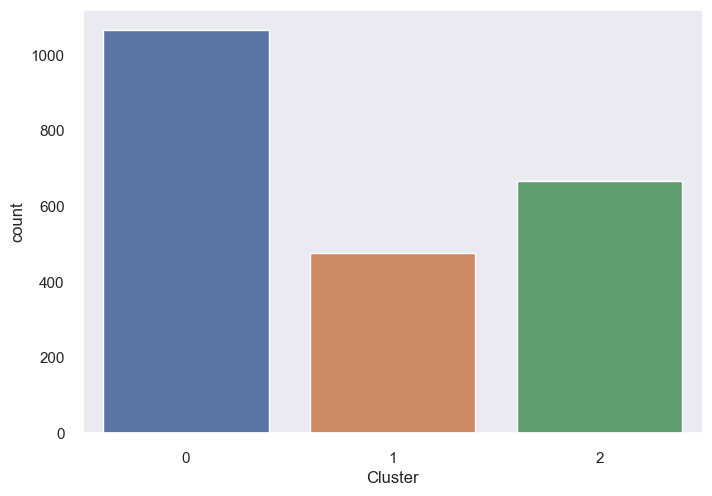

In [63]:
# VALUE COUNTS OF CLUSTERS
sns.countplot(data=df_copy,x='Cluster')

* **There are more customers in Cluster 0 and the in 2,1**
* **In Cluster 3 there are less customers**

Text(0.5, 0.98, "Cluster's Profile based on Amount Spent and Income")

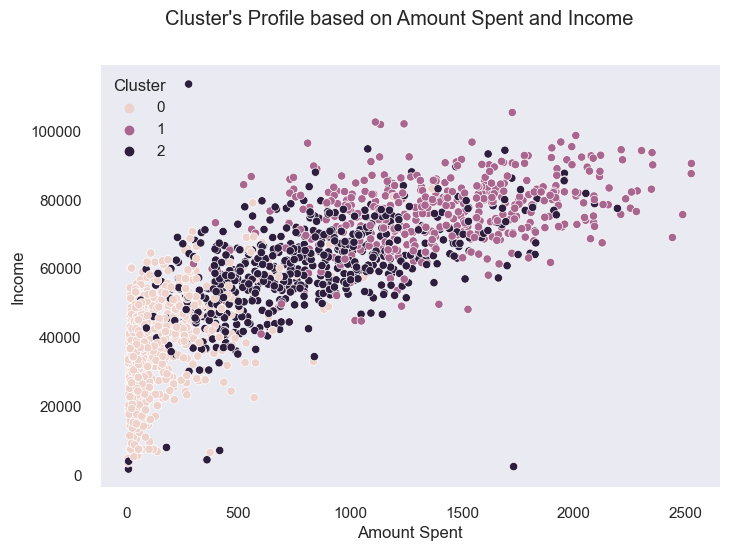

In [64]:
sns.scatterplot(data=df_copy,x='Amount Spent',y='Income',hue='Cluster')
sns.despine()
plt.grid(False)
plt.suptitle("Cluster's Profile based on Amount Spent and Income")

In [65]:
px.box(data_frame=df_copy,y='Amount Spent',color='Cluster',notched=True)

In [66]:
px.violin(data_frame=df_copy,y='Amount Spent',color='Cluster')

Text(0.5, 0.98, "Cluster's Profile based on Amount Spent")

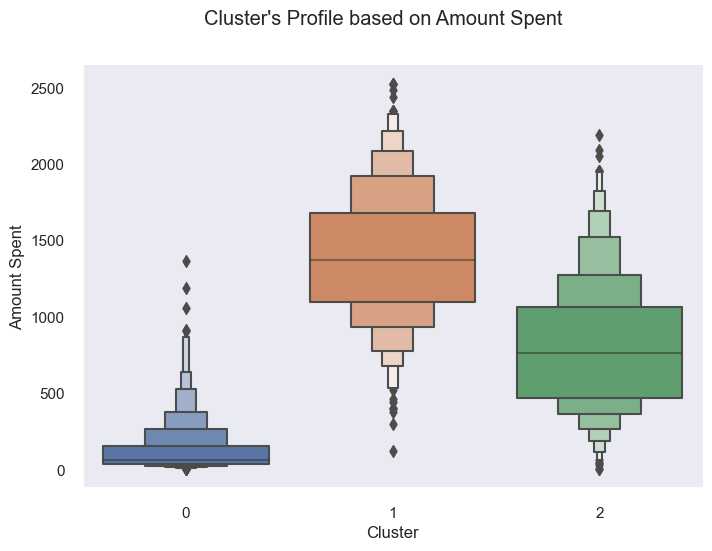

In [67]:
sns.boxenplot(data=df_copy,y='Amount Spent',x='Cluster')
sns.despine()
plt.grid(False)
plt.suptitle("Cluster's Profile based on Amount Spent")

* **We can see that Inter-Quartile Range of Amount Spent of Cluster 1 and 2 clearly seperate.**

Text(0.5, 0.98, "Cluster's Profile based on Income")

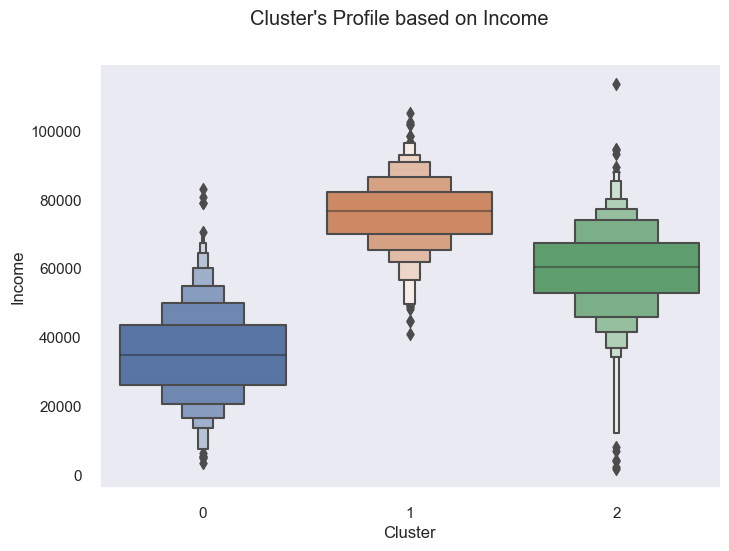

In [68]:
sns.boxenplot(data=df_copy,y='Income',x='Cluster')
sns.despine()
plt.grid(False)
plt.suptitle("Cluster's Profile based on Income")

**Based on Income, We can say that**
* **Customers belonging to Cluster 1 are having more income.**
* **After then,customers of Cluster 2 and then 0.**
* **There are less number of Customers in Cluster 3.**

Text(0.5, 0.98, "Cluster's Profile based on Education")

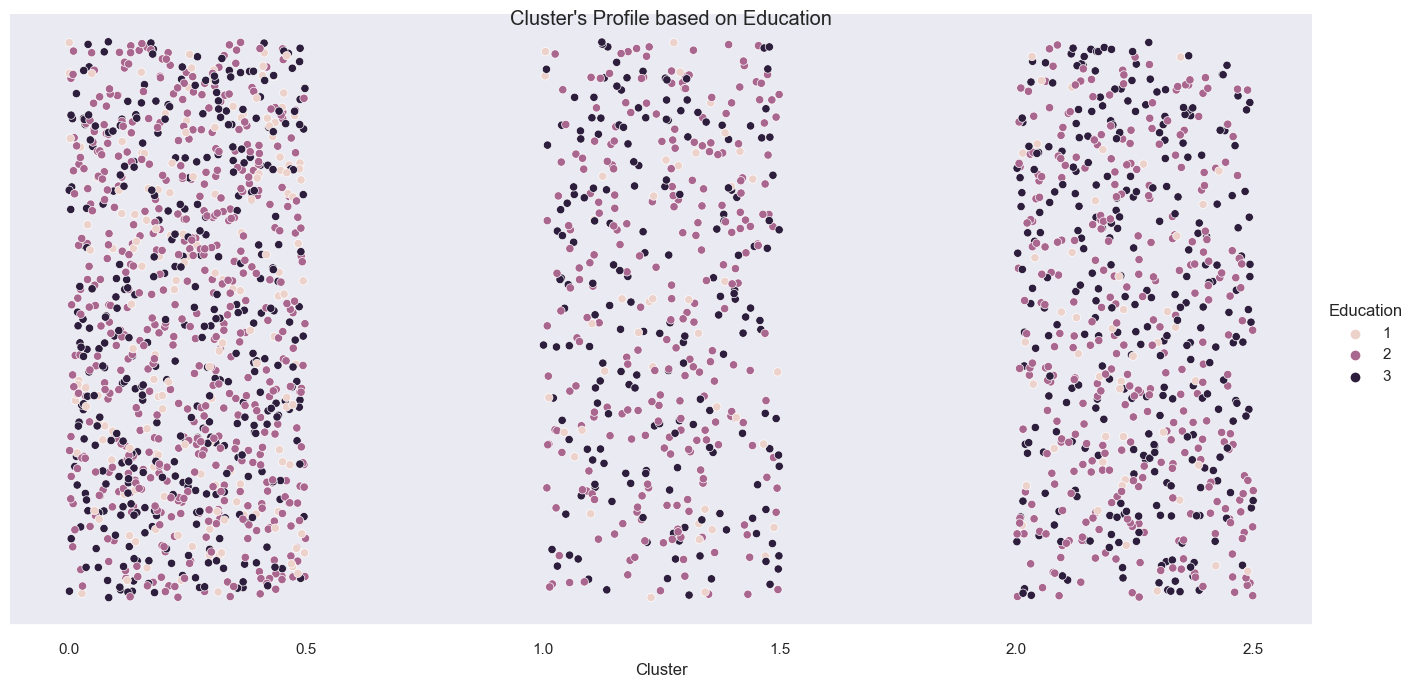

In [69]:
xnoise = np.random.random(len(df))/2
ynoise = np.random.random(len(df))/2
sns.relplot(x=df_copy['Cluster']+xnoise,y=ynoise,hue=df_copy['Education'],height=7,aspect=2)
sns.despine(left=True)
plt.grid(False)
plt.yticks([])
plt.suptitle("Cluster's Profile based on Education")

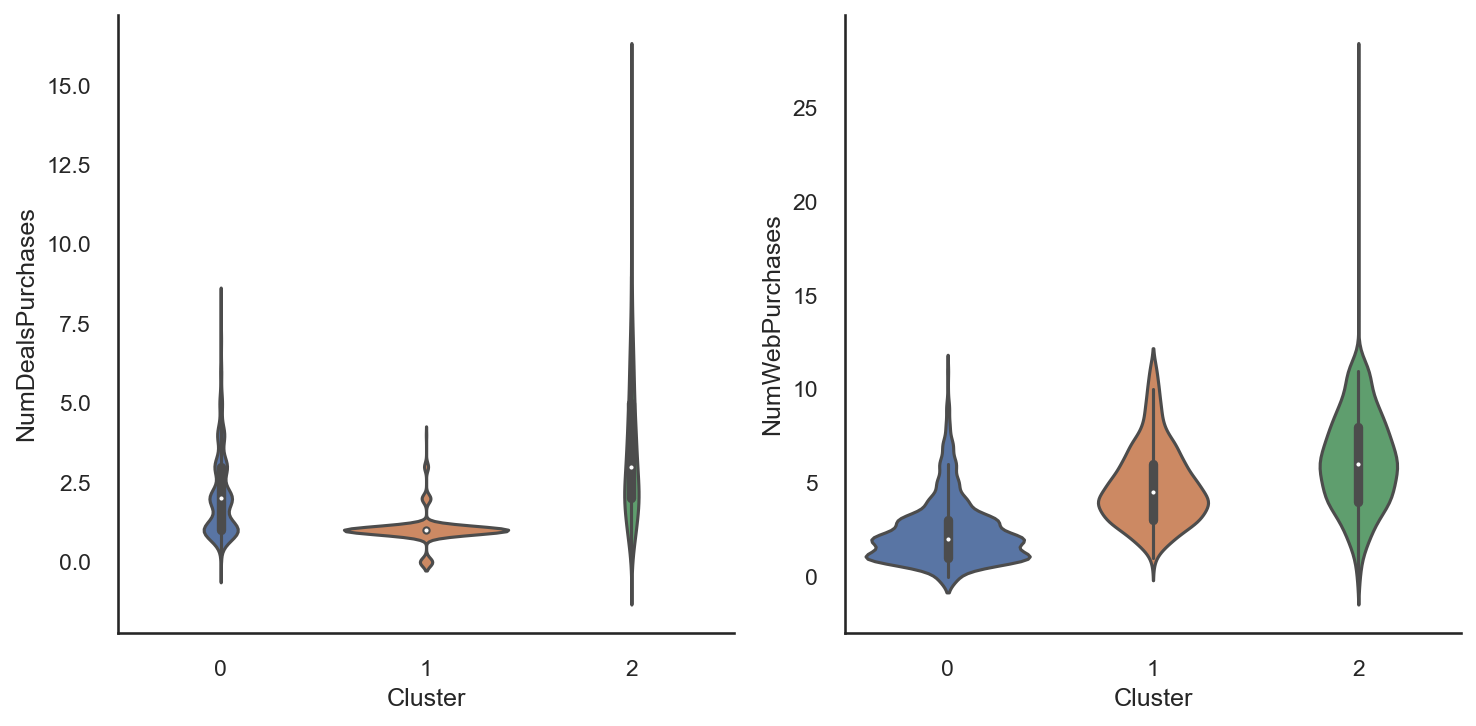

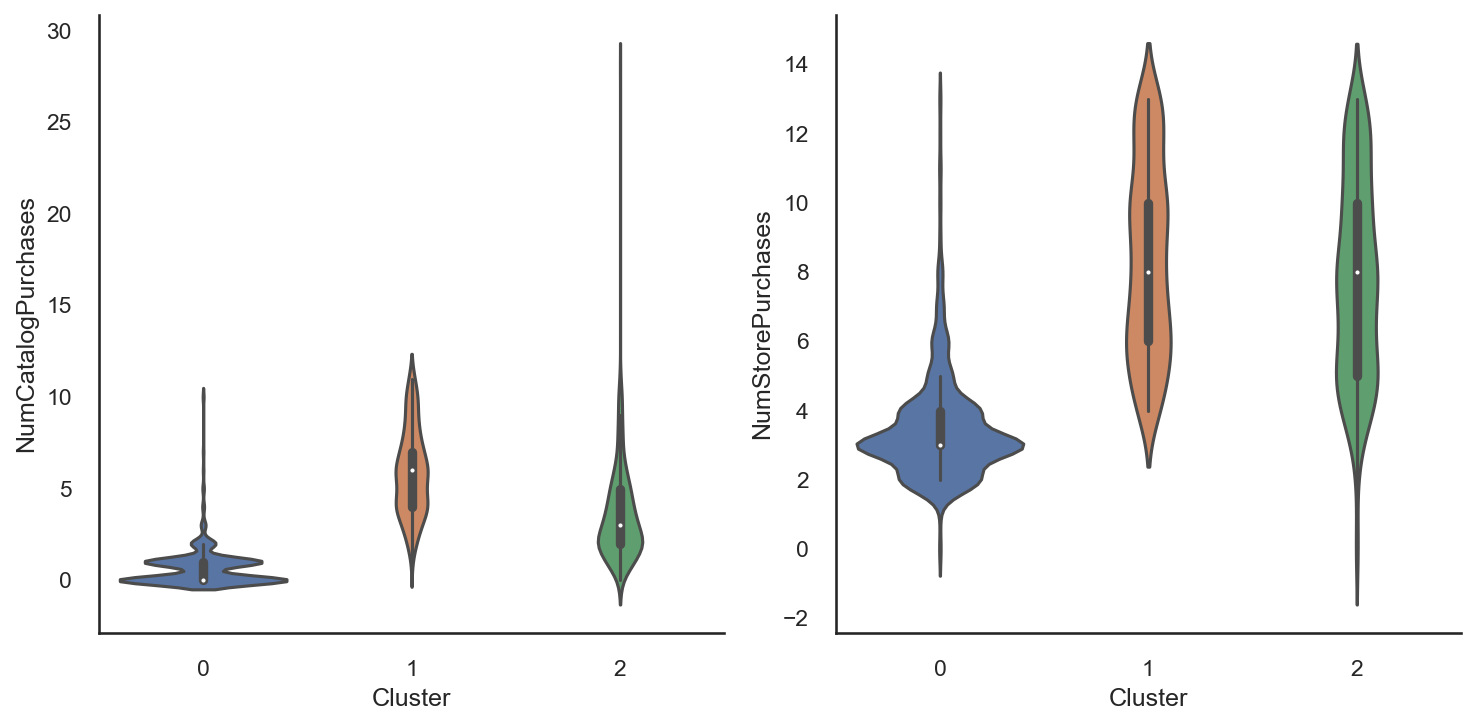

In [70]:
sns.set_style('white')
l1 = ['NumDealsPurchases', 'NumWebPurchases']
fig,axes = plt.subplots(1,2,figsize=(10,5),dpi=150)
plt.grid(False)
for i in range(len(l1)):       
    sns.violinplot(data=df_copy,x='Cluster',y=l1[i],ax=axes[i])
    sns.despine()
plt.tight_layout()    

l2 = ['NumCatalogPurchases', 'NumStorePurchases']
fig,axes = plt.subplots(1,2,figsize=(10,5),dpi=150)
plt.grid(False)
for i in range(len(l2)):       
    sns.violinplot(data=df_copy,x='Cluster',y=l2[i],ax=axes[i])
    sns.despine()
plt.tight_layout()    

In [71]:
amount_spent_cols = ['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts',
                    'MntSweetProducts','MntGoldProds','Cluster']                    

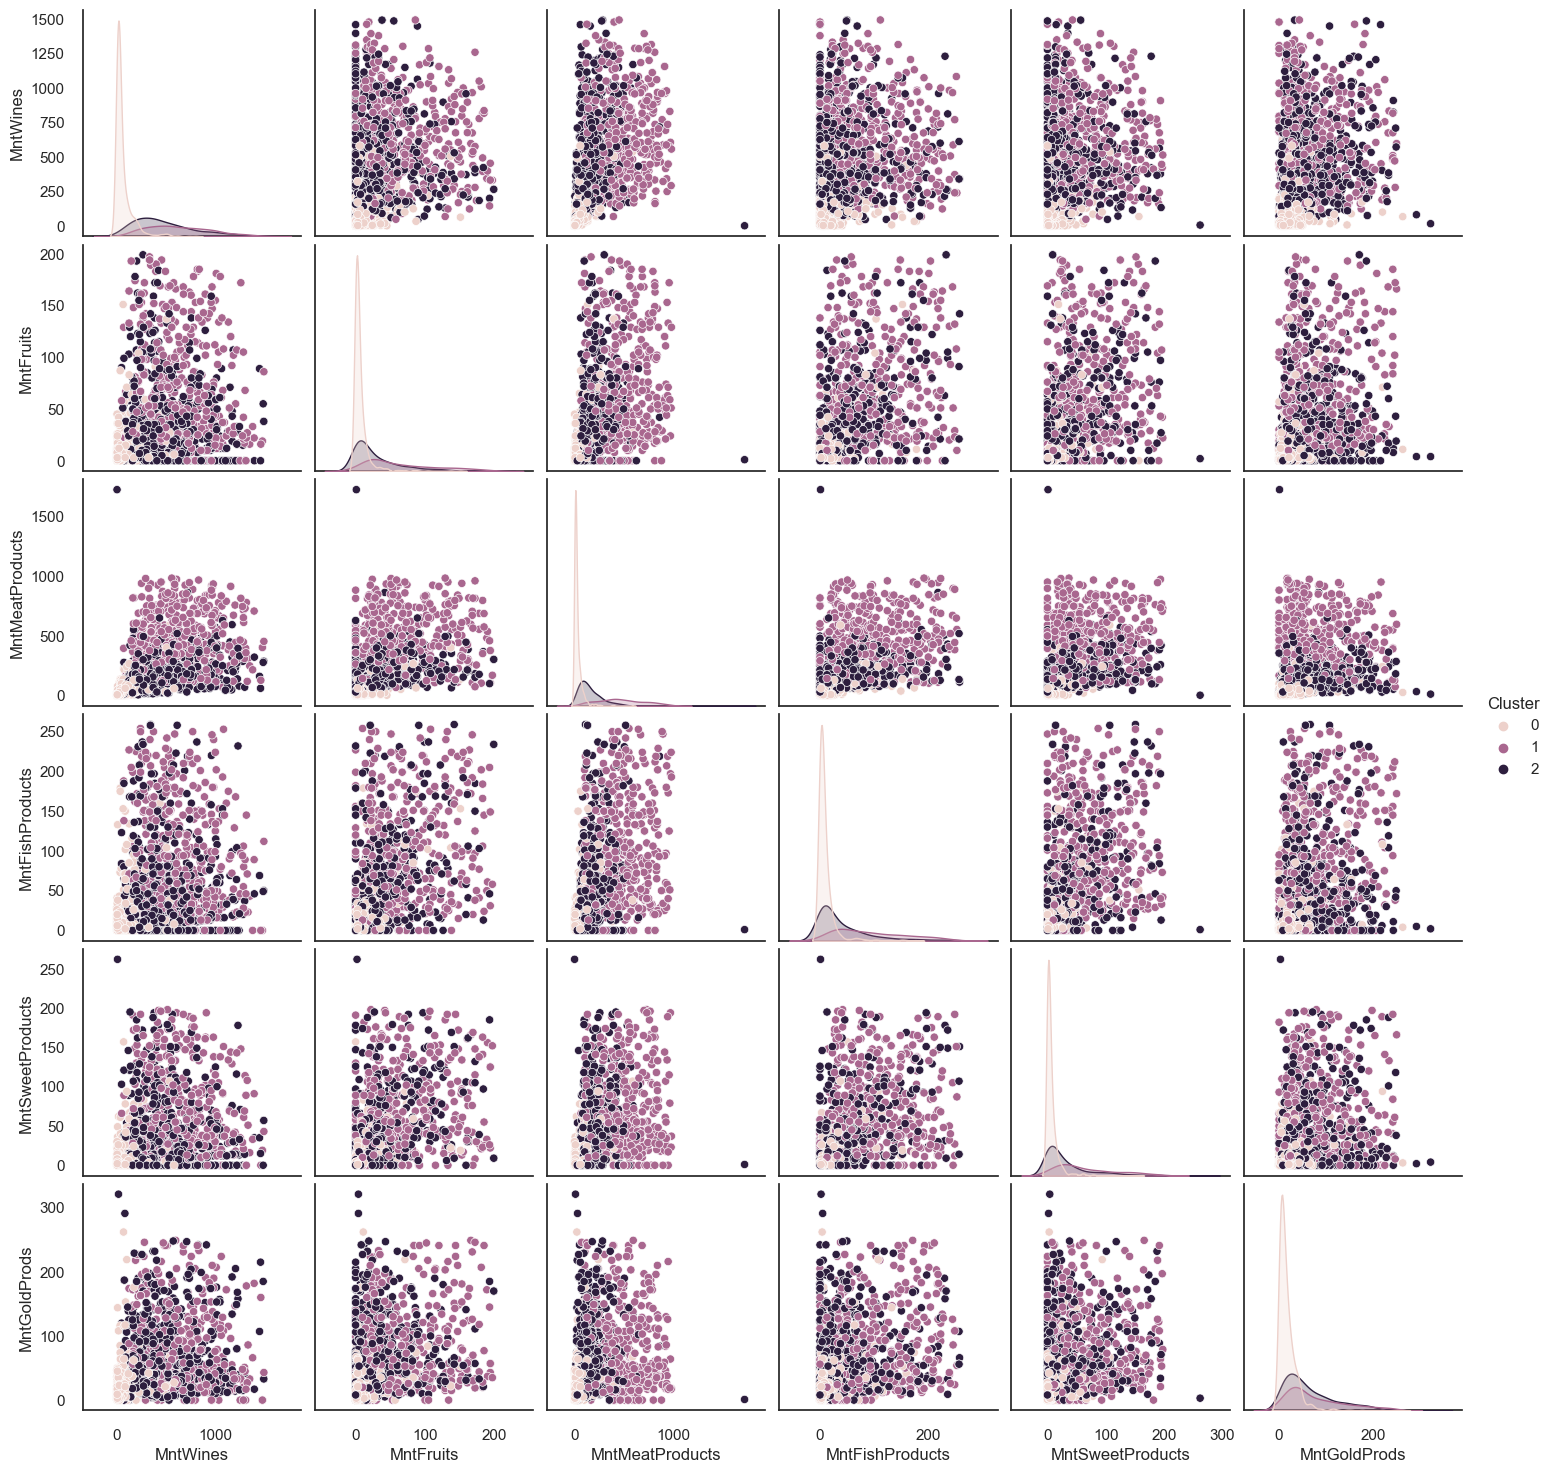

In [72]:
sns.pairplot(data=df_copy[amount_spent_cols],hue='Cluster')

## Dimensionality Reduction
## PCA


In [73]:
pca = PCA(n_components=3)
pca.fit(scaled_df_copy)

PCA(n_components=3)

In [74]:
np.sum(pca.explained_variance_ratio_)

0.536604668622602

In [75]:
principal_components_df =  pd.DataFrame(pca.transform(scaled_df_copy),
            columns=['Principal Component 1','Principal Component 2','Principal Component 3'])
principal_components_df                                              

Principal Component 1  Principal Component 2  Principal Component 3
0                  4.883533              -0.044973               2.704985
1                 -2.664784              -0.686833              -1.468082
2                  2.361789              -0.575457              -0.191352
3                 -2.684372              -1.156884              -0.739956
4                 -0.433232               0.982660              -0.612742
...                     ...                    ...                    ...
2203               2.325185               1.983905               0.984082
2204              -2.224396               4.216737              -2.484780
2205               2.393271              -1.825205               0.468212
2206               1.541718               1.363152              -1.980776
2207              -2.411401               1.711849              -0.818368

[2208 rows x 3 columns]

In [76]:
px.scatter_3d(data_frame=principal_components_df,x='Principal Component 1',
              y='Principal Component 2',z='Principal Component 3')

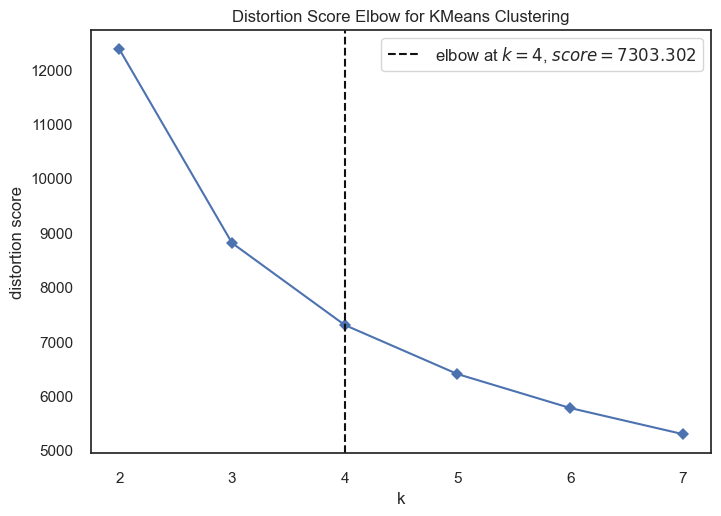

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [77]:
k_elbow_visualizer = KElbowVisualizer(estimator=KMeans(),k=(2,8),timings=False)
k_elbow_visualizer.fit(principal_components_df)
k_elbow_visualizer.show()

In [78]:
agglomerative_model = AgglomerativeClustering(n_clusters=3)
pred = agglomerative_model.fit_predict(principal_components_df)
principal_components_df['Clusters'] = pred
df_copy['PC_Clusters'] = pred

In [79]:
px.scatter_3d(data_frame=principal_components_df,x='Principal Component 1',
              y='Principal Component 2',z='Principal Component 3',color='Clusters')

<Axes: xlabel='PC_Clusters', ylabel='count'>

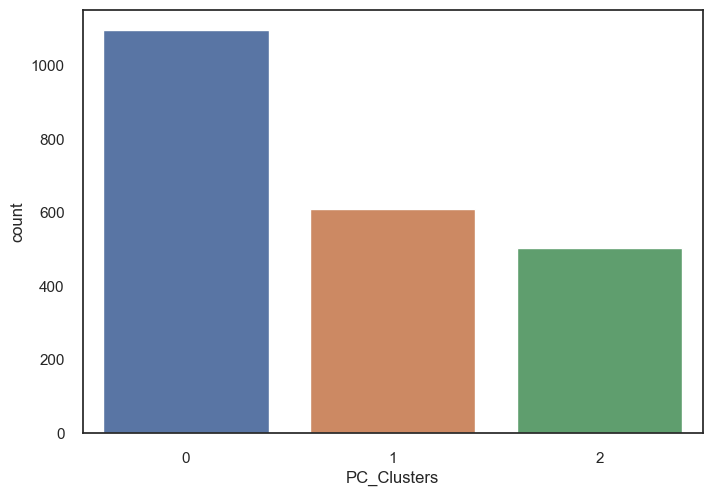

In [80]:
# VALUE COUNTS OF PRINCIPAL COMPONENTS CLUSTERS
sns.countplot(data=df_copy,x='PC_Clusters')

Text(0.5, 0.98, "PC_Cluster's Profile based on Amount Spent and Income")

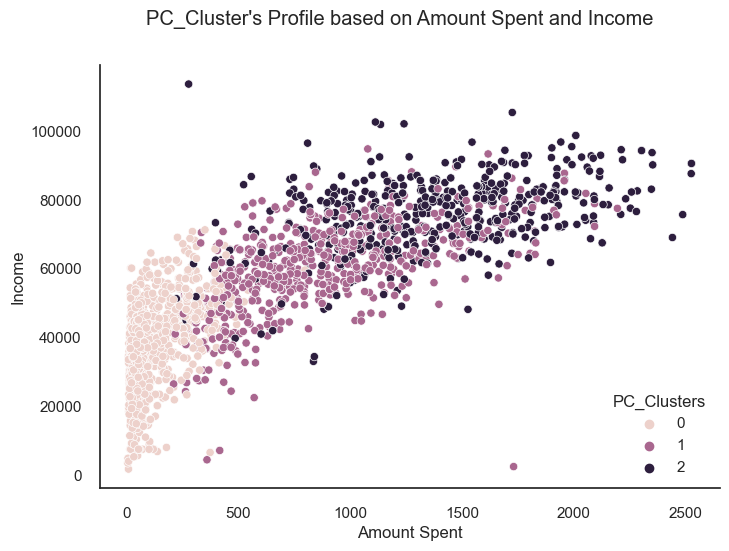

In [81]:
sns.scatterplot(data=df_copy,x='Amount Spent',y='Income',hue='PC_Clusters')
sns.despine()
plt.grid(False)
plt.suptitle("PC_Cluster's Profile based on Amount Spent and Income")